In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker

In [2]:
#list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_test2_20230124/lnd/hist/NSSP534frc2esm_f19_tn14_test2_20230124.clm2.h0.2015-01.nc"]
#dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)

file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'
dset = xr.open_dataset(file, decode_times=False)
dset=dset.assign_coords(lsmlat=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(lsmlon=dset['LONGXY'][0,:].values)
dset.coords['time'].attrs = {'long_name': 'Time(year)'}
dset.coords['natpft'].attrs = {'long_name': 'Area'}
lat, lon, time, area, year = dset['lsmlat'], dset['lsmlon'], dset['time'], dset['AREA'], dset['YEAR']
var = ['PCT_NAT_PFT', 'PCT_CFT','PCT_CROP','GRAZING']
variables = np.multiply((dset[var]/100), dset['AREA']) # converting to area fraction
variables_mean = variables.sum(['lsmlat','lsmlon'])
dset.time



<xarray.DataArray 'time' (time: 251)>
array([1850, 1851, 1852, ..., 2098, 2099, 2100], dtype=int32)
Coordinates:
  * time     (time) int32 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Attributes:
    long_name:  Time(year)

In [3]:
dset

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, lsmlat: 96, lsmlon: 144,
                              time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * lsmlat                   (lsmlat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lsmlon                   (lsmlon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK             (lsmlat, lsmlon) int32 ...
    PCT_CROP                 (time, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0 0.0
    PCT_CROP_MAX             (lsmlat, lsmlon) float64 ...
    PCT_NAT_PFT              (time, natpft, lsmlat, lsmlon) float64 100.0 ......
    PCT_NAT_PFT_MAX          (natpft, lsmlat, lsmlon) float64 ...
    ...                       ...
    HARVEST_SH2              (time, lsmlat, lsmlon) float64 ...
    HARVEST_SH3              (time, lsmlat, lsmlon) float64 ...
    GRAZING                  (time, lsmlat, lsmlon) float64 -9.999e+03 ... 0.0
    FERTNITRO_CFT            (time, cft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, lsmlat, lsmlon) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [50]:
((dset['PCT_CROP'].sel(time=i))-(dset['PCT_CROP'].sel(time=2015))).sum()

<xarray.DataArray 'PCT_CROP' ()>
array(17562.42224156)

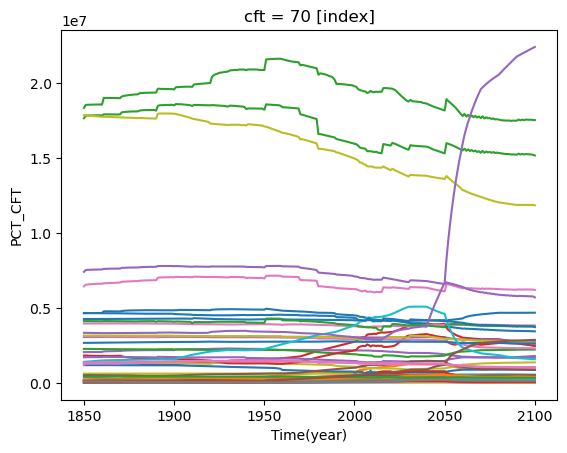

In [96]:
#variables_mean[ 'PCT_CFT'][:,0].plot()
variables_mean[ 'PCT_CFT'][:,2].plot()
variables_mean[ 'PCT_CFT'][:,3].plot()
variables_mean[ 'PCT_CFT'][:,4].plot()
variables_mean[ 'PCT_CFT'][:,5].plot()
variables_mean[ 'PCT_CFT'][:,8].plot()
variables_mean[ 'PCT_CFT'][:,9].plot()
variables_mean[ 'PCT_CFT'][:,10].plot()
variables_mean[ 'PCT_CFT'][:,11].plot()
variables_mean[ 'PCT_CFT'][:,14].plot()
variables_mean[ 'PCT_CFT'][:,15].plot()
variables_mean[ 'PCT_CFT'][:,18].plot()
variables_mean[ 'PCT_CFT'][:,19].plot()
variables_mean[ 'PCT_CFT'][:,20].plot()
variables_mean[ 'PCT_CFT'][:,21].plot()
variables_mean[ 'PCT_CFT'][:,22].plot()
variables_mean[ 'PCT_CFT'][:,23].plot()
variables_mean[ 'PCT_CFT'][:,24].plot()
variables_mean[ 'PCT_CFT'][:,25].plot()
variables_mean[ 'PCT_CFT'][:,26].plot()
variables_mean[ 'PCT_CFT'][:,27].plot()
variables_mean[ 'PCT_CFT'][:,28].plot()
variables_mean[ 'PCT_CFT'][:,29].plot()
variables_mean[ 'PCT_CFT'][:,30].plot()
variables_mean[ 'PCT_CFT'][:,31].plot()
variables_mean[ 'PCT_CFT'][:,32].plot()
variables_mean[ 'PCT_CFT'][:,33].plot()
variables_mean[ 'PCT_CFT'][:,34].plot()
variables_mean[ 'PCT_CFT'][:,35].plot()
variables_mean[ 'PCT_CFT'][:,36].plot()
variables_mean[ 'PCT_CFT'][:,37].plot()
variables_mean[ 'PCT_CFT'][:,38].plot()
variables_mean[ 'PCT_CFT'][:,39].plot()
variables_mean[ 'PCT_CFT'][:,40].plot()
variables_mean[ 'PCT_CFT'][:,41].plot()
variables_mean[ 'PCT_CFT'][:,42].plot()
variables_mean[ 'PCT_CFT'][:,43].plot()
variables_mean[ 'PCT_CFT'][:,44].plot()
variables_mean[ 'PCT_CFT'][:,45].plot()
variables_mean[ 'PCT_CFT'][:,46].plot()
variables_mean[ 'PCT_CFT'][:,47].plot()
variables_mean[ 'PCT_CFT'][:,48].plot()
variables_mean[ 'PCT_CFT'][:,49].plot()
variables_mean[ 'PCT_CFT'][:,50].plot()
variables_mean[ 'PCT_CFT'][:,51].plot()
variables_mean[ 'PCT_CFT'][:,52].plot()
variables_mean[ 'PCT_CFT'][:,53].plot()
variables_mean[ 'PCT_CFT'][:,54].plot()
variables_mean[ 'PCT_CFT'][:,55].plot()



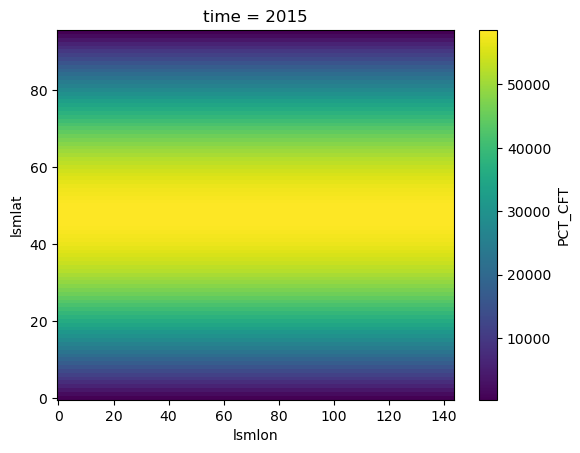

In [103]:
variables['PCT_CFT'].sum(dim='cft').sel(time=2015).plot()

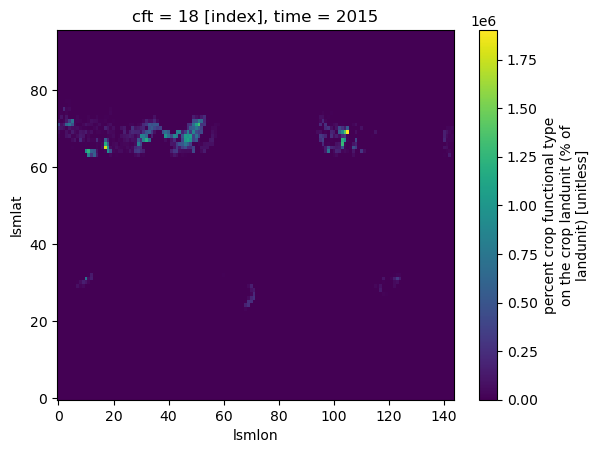

In [110]:
#np.multiply(dset['PCT_NAT_PFT'][0,0,:,:],dset['AREA']).plot()
np.multiply((dset['PCT_CFT'].isel(cft=3).sel(time=2015)),dset['AREA']).plot()

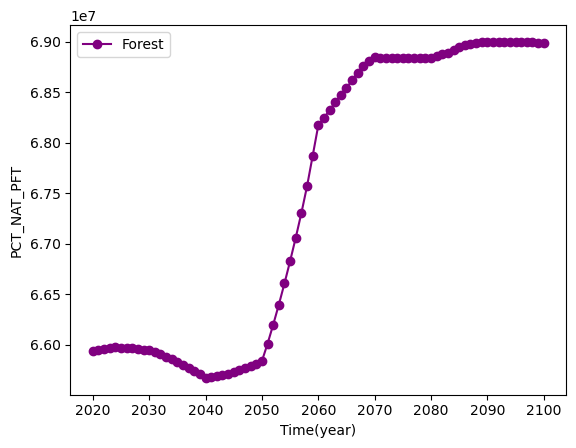

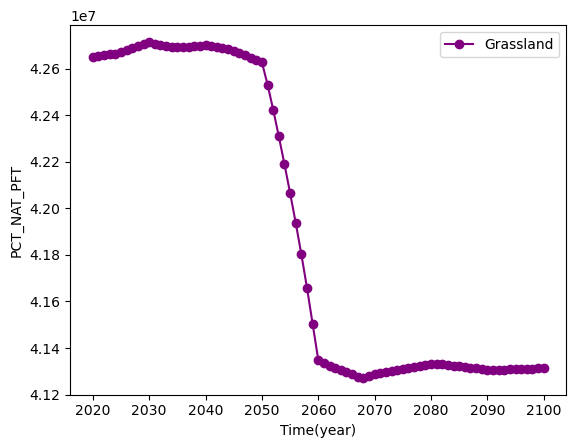

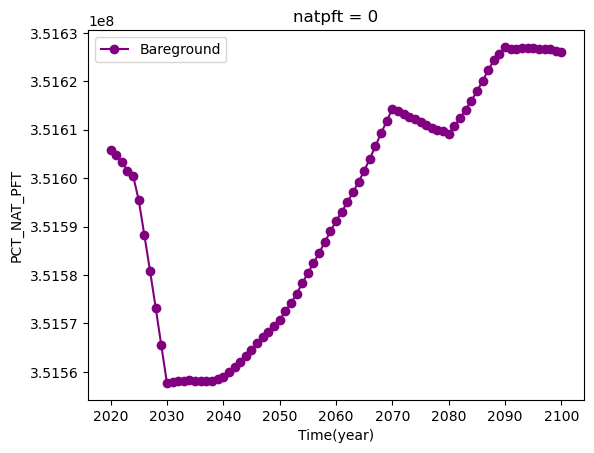

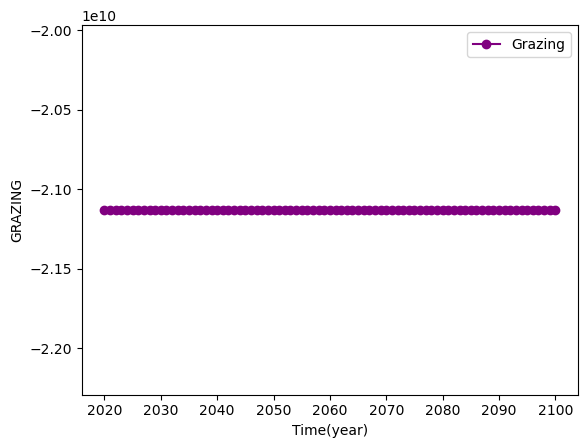

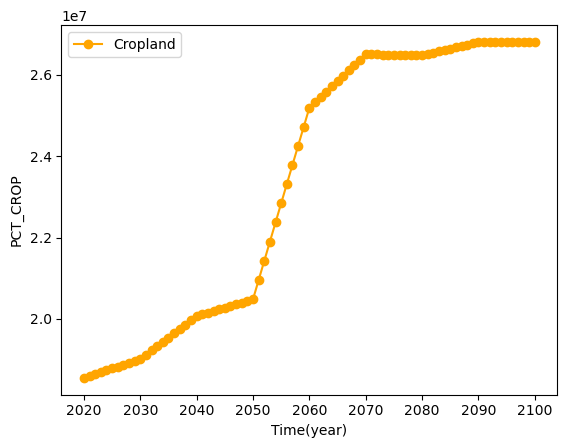

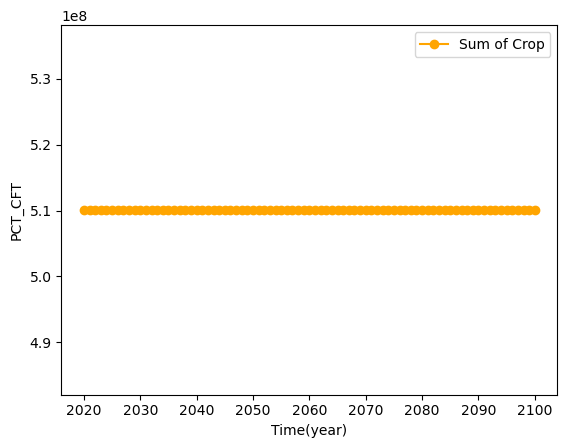

In [4]:
#a=variables_mean['PCT_NAT_PFT'][:,0].plot.line(color="black", marker="o",label='Bareground')

#a.attrs["units"]= "Area fraction"
#a.plot.line(color="green", marker="o",label='Black')
#variables_mean['PCT_NAT_PFT'].isel(natpft=slice(1,4)).sum(dim='natpft').plot.line(color="green", marker="o",label='Needleleaf evergreen')
#variables_mean['PCT_NAT_PFT'].isel(natpft=slice(4,12)).sum(dim='natpft').plot.line(color="orange", marker="o",label='Broadleaf evergreen')
start_time = '2020'
end_time = '2100'

#var_sel = var.sel(time=slice(start_time, end_time))
Bareground=variables_mean['PCT_NAT_PFT'].isel(natpft=0)
Forest=variables_mean['PCT_NAT_PFT'][:,1:11].sum(dim='natpft')
Grassland=variables_mean['PCT_NAT_PFT'][:,12:14].sum(dim='natpft')

Forest.sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Forest')
plt.legend()
plt.show()
Grassland.sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Grassland')
plt.legend()
plt.show()
Bareground.sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Bareground')
plt.legend()
plt.show()
variables_mean['GRAZING'].sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Grazing')
plt.legend()
plt.show()
variables_mean['PCT_CROP'].sel(time=slice(start_time, end_time)).plot.line(color="orange", marker="o",label='Cropland')
plt.legend()
plt.show()
#Forest.sel(time=slice(start_time, end_time))
#plt.ylim(2200, 3800)

variables_mean['PCT_CFT'].sum(dim='cft').sel(time=slice(start_time, end_time)).plot.line(color="orange", marker="o",label='Sum of Crop')
plt.legend()
plt.show()

In [18]:
start_time = '2020'
end_time = '2100'


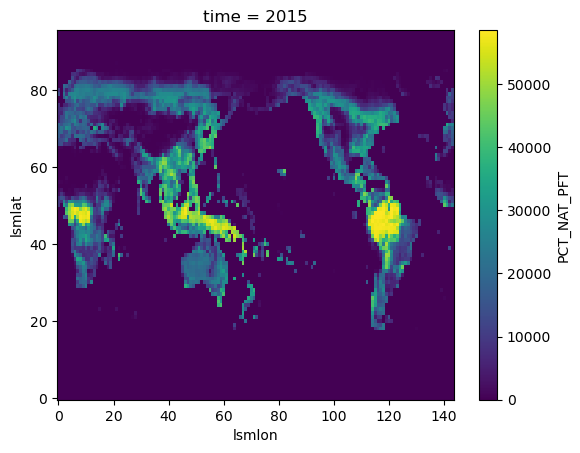

In [4]:

forest=variables['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')
forest.sel(time=2015).plot()
#forest.coastlines(linewidth=1)
#forest


In [5]:
(variables_mean['PCT_NAT_PFT'][:,1]).equals(variables_mean['PCT_NAT_PFT'][:,0:1])
(variables_mean['PCT_NAT_PFT'][:,1:11]).equals(variables_mean['PCT_NAT_PFT'].isel(natpft=slice(1,11)))

True

In [6]:
#file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/surfdata_1.9x2.5_78pfts_CMIP6_simyr1850_c170824.nc'
file2 = '/cluster/shared/noresm/inputdata/lnd/clm2/urbandata/CLM50_tbuildmax_Oleson_2016_0.9x1.25_simyr1849-2106_c160923.nc'
dset2 = xr.open_dataset(file2, decode_times=False)
#var2 = ['PCT_URBAN', 'PCT_CROP', 'PCT_NATVEG','PCT_GLACIER','PCT_CFT', 'PCT_LAKE']
#dset2['AREA'].equals(dset['AREA'])
#variables = np.multiply((dset2[var2]/100), dset['AREA']) # converting to area fraction
#variables_mean = variables.mean(['lsmlat','lsmlon'])
#variables_mean['PCT_CFT'].plot()
dset2


<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, time: 258, nv: 2)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.7
  * time           (time) float64 6.749e+05 6.752e+05 ... 7.683e+05 7.687e+05
Dimensions without coordinates: nv
Data variables:
    LATIXY         (lat, lon) float64 ...
    LONGXY         (lat, lon) float64 ...
    LANDMASK       (lat, lon) int32 ...
    area           (lat, lon) float64 ...
    year           (time) int32 ...
    time_bnds      (time, nv) float64 ...
    tbuildmax_TBD  (time, lat, lon) float64 ...
    tbuildmax_HD   (time, lat, lon) float64 ...
    tbuildmax_MD   (time, lat, lon) float64 ...
Attributes:
    date:     Fri Jun 10 13:15:08 MDT 2016
    case_id:  Base data is from surfdata_0.9x1.25_16pfts_simyr2000_c160127.nc
    source:   /glade/p/cgd/tss/people/oleson/urban_sfcdata/Feddema_urban_data...
    title:    Streams File for Maximum Building Interior Temperature for TBD,...
    history:  Mon Aug  1 15:51:49 2016: ncatted -a long_name,tbuildmax_TBD,o,...

In [3]:

dset['PCT_CROP'].time

<xarray.DataArray 'time' (time: 251)>
array([1850, 1851, 1852, ..., 2098, 2099, 2100], dtype=int32)
Coordinates:
  * time     (time) int32 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Attributes:
    long_name:  Time(year)